In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

## NumPy Operations

In [23]:
# Create an array and perform elementwise operations
arr = np.arange(1_000)             # array: 0, 1, 2, ..., 999
arr_plus_5 = arr + 5               # add 5 to each element
arr_squared = arr ** 2             # square each element

print("First 10 elements (original):", arr[:10])
print("First 10 elements (+5):", arr_plus_5[:10])
print("First 10 elements (squared):", arr_squared[:10])

# Compare loop vs vectorized execution for y = 3x^2 + 2x + 1
# Loop
start = time.perf_counter()
y_loop = [3*x**2 + 2*x + 1 for x in arr]
loop_time = time.perf_counter() - start

# Vectorized
start = time.perf_counter()
y_vec = 3 * arr**2 + 2 * arr + 1
vec_time = time.perf_counter() - start

print(f"\nLoop time:       {loop_time:.6f} seconds")
print(f"Vectorized time: {vec_time:.6f} seconds")
print(f"Speedup:         {loop_time / vec_time:.2f}x faster")

First 10 elements (original): [0 1 2 3 4 5 6 7 8 9]
First 10 elements (+5): [ 5  6  7  8  9 10 11 12 13 14]
First 10 elements (squared): [ 0  1  4  9 16 25 36 49 64 81]

Loop time:       0.000690 seconds
Vectorized time: 0.000159 seconds
Speedup:         4.33x faster


## Dataset Loading

In [24]:
# Load provided CSV using pandas
df = pd.read_csv("../data/raw/starter_data.csv")

# Inspect the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes
None
  category  value        date
0        A     10  2025-08-01
1        B     15  2025-08-02
2        A     12  2025-08-03
3        B     18  2025-08-04
4        C     25  2025-08-05


## Summary Statistics

In [25]:
# Summary statistics for numeric columns
print(df.describe())

# Grouped aggregation by a categorical column
summary = df.groupby('category').mean(numeric_only=True).reset_index()
print(summary)

           value
count  10.000000
mean   17.600000
std     7.381659
min    10.000000
25%    12.250000
50%    14.500000
75%    23.250000
max    30.000000
  category      value
0        A  11.500000
1        B  15.666667
2        C  27.666667


## Save Outputs

Summary saved to data/processed/summary.csv
Plot saved to data/processed/summary_plot.png


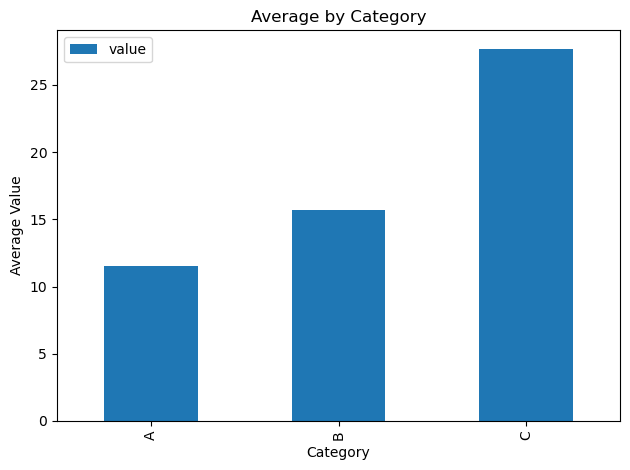

In [26]:
# Save summary stats to CSV
summary.to_csv("../data/processed/summary.csv", index=False)
print("Summary saved to data/processed/summary.csv")

# Bonus: Create and save a basic plot
summary.plot(x='category', y=summary.columns[1], kind='bar', title='Average by Category')
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.tight_layout()
plt.savefig("../data/processed/summary_plot.png")
print("Plot saved to data/processed/summary_plot.png")

## Reusable Functions

In [27]:
# Utility function to summarize numeric columns by category
def get_summary_stats(df, category_col):
    """
    Returns mean values of numeric columns grouped by the given category column.
    """
    summary = df.groupby(category_col).mean(numeric_only=True).reset_index()
    return summary

# Example usage
summary = get_summary_stats(df, 'category')
print(summary)

  category      value
0        A  11.500000
1        B  15.666667
2        C  27.666667


In [33]:
# Bonus: move function to src/utils.py and import it
import sys, os
sys.path.insert(0, os.path.abspath(".."))  # go up one level to homework3/
from src.utils import get_summary_stats

summary = get_summary_stats(df, 'category')
print(summary)

  category      value
0        A  11.500000
1        B  15.666667
2        C  27.666667
